# Business Problem

We need to predict the employment number by using the data which we have for various polulation, army , inflation.

We need to build a model such that if we have the data of above values then we can predict the employment. The data was random collection and the county and other confidential fields are not provided for analysis.

Data is of GNP.deflator, GNP Unemployed, Armed.Forces, Population, Employed variables. We have to use the data for prediction of the Employed variable.

This data is only of numbers so creating dummy and categorical data handling is saved here.

# Solution Approach:
As we need to predict Employed variable which is continuous in nature, Linear Regression can be used for prediction.

## Multiple Linear Regression
Now you know how to build a model with one X (feature variable) and Y (response variable). But what if you have three feature variables, or may be 10 or 100? Building a separate model for each of them, combining them, and then understanding them will be a very difficult and next to impossible task. By using multiple linear regression, you can build models between a response variable and many feature variables.

Let's see how to do that.

## Step 1 : Importing LIbraries and Understanding Data
Numpy, pandas , seaborn and matplotlib.pyplot are imported with aliases np, pd, sns and plt respectively

In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Reading a csv file
df = pd.read_csv('employed.csv')

In [3]:
#Dimensions of the dataframe
df.shape

(2938, 6)

In [4]:
#First 10 rows of the dataframe
df.head(10)

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
0,83.0,234.289,235.6,159.0,107.608,60.323
1,88.5,259.426,232.5,145.6,108.632,61.122
2,88.2,258.054,368.2,161.6,109.773,60.171
3,89.5,284.599,335.1,165.0,110.929,61.187
4,96.2,328.975,209.9,309.9,112.075,63.221
5,98.1,346.999,193.2,359.4,113.270,63.639
6,99.0,365.385,187.0,354.7,115.094,64.989
7,100.0,363.112,357.8,335.0,116.219,63.761
8,101.2,397.469,290.4,304.8,117.388,66.019
9,104.6,419.180,282.2,285.7,118.734,67.857


In [5]:
#Data type of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GNP.deflator  2938 non-null   float64
 1   GNP           2938 non-null   float64
 2   Unemployed    2938 non-null   float64
 3   Armed.Forces  2938 non-null   float64
 4   Population    2938 non-null   float64
 5   Employed      2938 non-null   float64
dtypes: float64(6)
memory usage: 137.8 KB


In [6]:
#Checking for a missing values
df.isnull().sum()

GNP.deflator    0
GNP             0
Unemployed      0
Armed.Forces    0
Population      0
Employed        0
dtype: int64

### Summary of the dataset

In [7]:
#Let's look at the statistical information about dataset
df.describe()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,3383.989632,30744.994551,19482.279926,9171.264779,2239.144062,1112.140688
std,1905.742557,17625.763439,11126.209407,5173.587165,1231.892846,607.796778
min,83.000000,234.289000,187.000000,145.600000,107.608000,60.171000
25%,1734.410625,15488.427358,9851.619375,4693.095625,1172.838137,586.041925
50%,3383.989632,30744.994550,19482.279925,9171.264780,2239.144062,1112.140688
75%,5033.568639,46001.561743,29112.940480,13649.433937,3305.449986,1638.239451
max,6683.147647,61258.128940,38743.601030,18127.603090,4371.755910,2164.338215


## Step 2: Visualizing Data

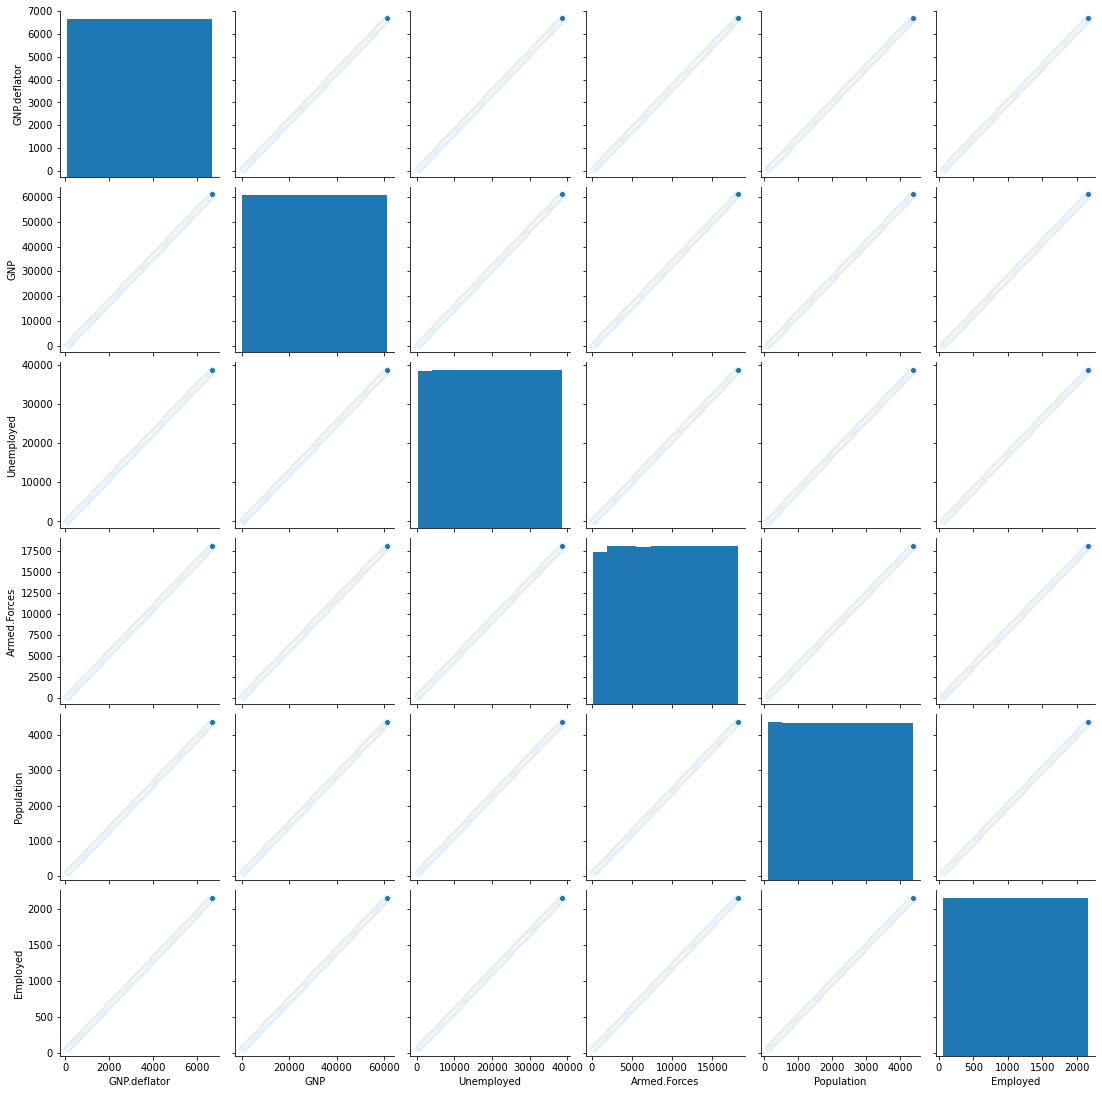

In [8]:
#Let's plot pair plot of all numerical variables of dataframe
sns.pairplot(df)

**WOW!!!! this is a blessing to have such data.. Super linear ..**

C:\Users\admin\conda\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


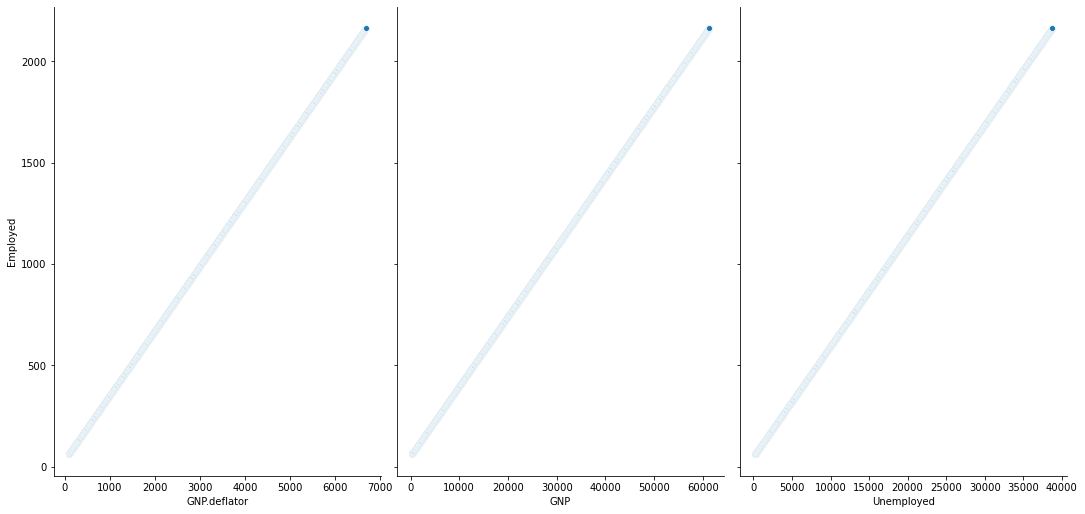

In [9]:
# Visualise the relationship between the features and the response using scatterplots
# Please do for remaining on your own..
sns.pairplot(df, x_vars=['GNP.deflator', 'GNP', 'Unemployed'], y_vars='Employed', size=7, aspect=0.7, kind='scatter')

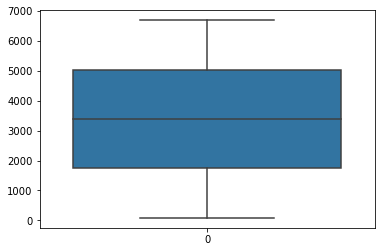

In [10]:
#Box plot of GNP.deflator variable
sns.boxplot(data=df['GNP.deflator'])

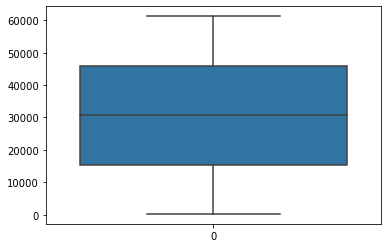

In [11]:
#Box plot of GNP variable
sns.boxplot(data=df['GNP'])

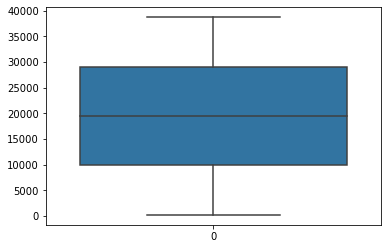

In [12]:
#Box plot of Unemployed variable
sns.boxplot(data=df['Unemployed'])

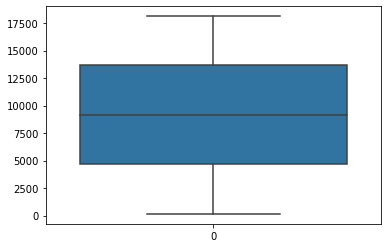

In [13]:
#Box plot of Armed.Forces variable
sns.boxplot(data=df['Armed.Forces'])

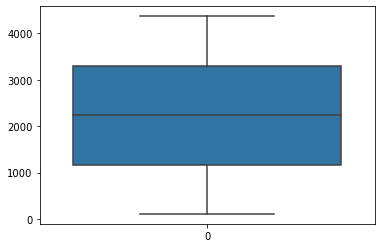

In [14]:
#Box plot of Population variable
sns.boxplot(data=df['Population'])

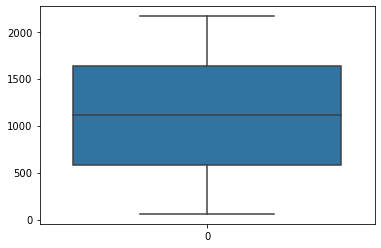

In [15]:
#Box plot of Employed variable
sns.boxplot(data=df['Employed'])

## Step 3: Splitting the data into Training and Test set

Using sklearn we split 70% of our data into training set and rest in test set.

Setting random_state will give the same training and test set everytime on running the code.

random_state is the seed used by the random number generator. It can be any integer.

In [16]:
#Seperate Independent and Dependent variable
X = df.drop('Employed', axis=1)
y = df['Employed']

In [17]:
#Creating Train and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.7, random_state=42)

## Step 4: Implement Linear Regression

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
#Creating an instance of LinearRegression
lr = LinearRegression()

In [20]:
#Fit the model to the training data
lr.fit(X_train, y_train)

LinearRegression()

## Step 5: Model Evaluation

In [21]:
#Print the intercept
lr.intercept_

104.3891525448189

In [22]:
#Let's see the coefficients
coeff_df = pd.DataFrame(lr.coef_, index=X_test.columns, columns=['Coefficient'])
coeff_df

,Coefficient
GNP.deflator,-0.059766
GNP,0.081650
Unemployed,-0.003062
Armed.Forces,-0.006316
Population,-0.528221


From the above result we may infer the results similar to the other case study. We can check what happens to the employed if we increase one unit of any variable.

## Step 6: Make Predictions

In [23]:
#Making predictions using the model
y_pred = lr.predict(X_test)

## Step 7: Model Performance Metrics

### Coefficient of Determination (R square)

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

In [25]:
print("Mean Squared Error : ", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", sqrt(mean_squared_error(y_test, y_pred)))
print("R-Square : ", r2_score(y_test, y_pred))

Mean Squared Error :  0.0002546113488622121
Root Mean Squared Error :  0.015956545643158862
R-Square :  0.9999999992956938


If the value of R2 is .99 then this suggests that 99% of the variation in Y can be explained with the help of given explanatory variables in that model. In other words, it explains the proportion of variation in the dependent variable that is explained by the independent variables.

You ever wondered why we got this amazing result because all the variables are linear.

Please try to do the correlation of all the variables and you will see that they are very correlated. We have done this below.

In [26]:
#Checking the correlation of all variables
df.corr()

,GNP.deflator,GNP,Unemployed,Armed.Forces,Population,Employed
GNP.deflator,1.0,1.0,1.000000,1.000000,1.0,1.0
GNP,1.0,1.0,1.000000,1.000000,1.0,1.0
Unemployed,1.0,1.0,1.000000,0.999999,1.0,1.0
Armed.Forces,1.0,1.0,0.999999,1.000000,1.0,1.0
Population,1.0,1.0,1.000000,1.000000,1.0,1.0
Employed,1.0,1.0,1.000000,1.000000,1.0,1.0


Here we can see that all variables are highly correlated with each other.

### Adjusted R square

**Adjusted R square will always be less than or equal to R square.**

Thus as a general thumb rule if Adjusted R square increases when a new variable is added to the model, the variable should remain in the model.

If the Adjusted R square decreases when the new variable is added then the variable should not remain in the model

### Multicollinearity
If independent valriables Xi’s are highly correlated then |X’X| will be close to 0 and hence inverse of (X’X) will not exist or will be indefinitely large. Mathematically, which will be indefinitely large in presence of multicollinearity. Long story in short, multicollinearity increases the estimate of standard error of regression coefficients which makes some variables statistically insignificant when they should be significant.

How can you detect multicollinearity!!

#### Correlation Method:
By calculating the correlation coefficients between the variables we can get to know about the extent of multicollinearity in the data.

#### VIF (Variance Inflation Factor) Method:
Firstly we fit a model with all the variables and then calculate the variance inflation factor (VIF) for each variable. VIF measures how much the variance of an estimated regression coefficient increases if your predictors are correlated. The higher the value of VIF for ith regressor, the more it is highly correlated to other variables

## Optional Step : Checking for P-value Using STATSMODELS

In [27]:
import statsmodels.api as sm
X_train_sm = X_train
#Unlike Sklearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X_train_sm = sm.add_constant(X_train_sm)
#Create a fitted model in one line
lm = sm.OLS(y_train, X_train_sm).fit()
#Print the Coefficients
lm.params

const           104.389153
GNP.deflator     -0.059766
GNP               0.081650
Unemployed       -0.003062
Armed.Forces     -0.006316
Population       -0.528221
dtype: float64

In [28]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Employed   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.452e+11
Date:                Fri, 05 Feb 2021   Prob (F-statistic):               0.00
Time:                        12:28:36   Log-Likelihood:                 4131.6
No. Observations:                2056   AIC:                            -8251.
Df Residuals:                    2050   BIC:                            -8217.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          104.3892      2.540     41.099      0.000      99.408     109.370
GNP.deflator    -0.0598      0.009     -6.691      0.000      -0.077      -0.042
GNP              0.0817      0.002     36.201      0.000       0.077       0.086
Unemployed      -0.0031      0.000    -10.083      0.000      -0.004      -0.002
Armed.Forces    -0.0063      0.000    -31.781      0.000      -0.007      -0.006
Population      -0.5282      0.024    -21.815      0.000      -0.576      -0.481
==============================================================================
Omnibus:                     2687.697   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         11774611.296
Skew:                           5.940   Prob(JB):                         0.00
Kurtosis:                     373.548   Cond. No.                     1.55e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.55e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

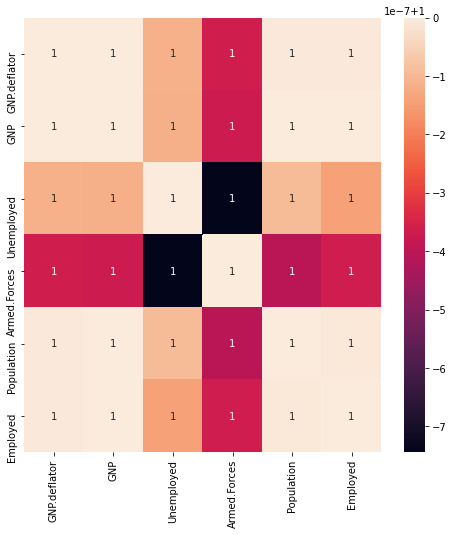

In [29]:
#Plotting heatmap of all variables
plt.figure(figsize=(8, 8))
sns.heatmap(df.corr(), annot=True)

## Step 8: Implementing the results

Text(0, 0.5, 'Actual-Predicted')

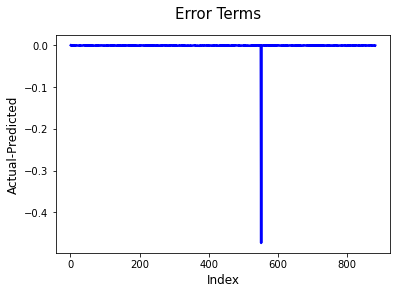

In [30]:
#Plotting the error terms
c = [i for i in range(1, 883, 1)]   #882 is length of the y_test
fig = plt.figure()
plt.plot(c, y_test-y_pred, color='blue', linewidth=2.5, linestyle='-')
fig.suptitle('Error Terms', fontsize=15)
plt.xlabel('Index', fontsize=12)
plt.ylabel('Actual-Predicted', fontsize=12)

**Remember this data is for practice and to understand the case. This will be very rare.**

**What we can learn here that the better the data have linear relationship the data will give you better result in the linear regression**

#### Variance Inflation Factor
Variance inflation factor (VIF) for an explanatory variable is given 1/(1-R^2 ) .

Here, we take that particular X as response variable and all other explanatory variables as independent variables. So, we run a regression between one of those explanatory variables with remaining explanatory variables.

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [32]:
#For each X, calculate VIF and save in dataframe
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF Factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [33]:
vif.round(2)

,Features,VIF Factor
0,GNP.deflator,1.380650e+09
1,GNP,4.048266e+08
2,Unemployed,3.131883e+07
3,Armed.Forces,1.122200e+07
4,Population,2.426823e+08


#### Variance Inflation Factor
Please read more about VIF and the cut off of Variance

The thumb rule is VIF greater than 10 should be removed.

We can clearly see that there is very high VIF, please try to understand the case one and two and compare results
You can find that the better linear relationship better results you can get